In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import db_builder.db_handler as dbh
import logging

logging.getLogger('sqlalchemy').setLevel(logging.WARNING)
db_params = {
    'user': 'postgres',
    'password': input('Please enter DB pw'),  # enter your DB password
    'host': 'localhost',  # 'localhost' or IP address
    'port': '5432',  # '5432'
    'database': 'ttdatabase',  #tensionTerminator
}
toolcheck = dbh.DB_Conn(db_params)
toolcheck.connect()
engine = toolcheck.get_engine()

Connected to PostgreSQL, DB: ttdatabase


In [7]:
def table_to_df(tabel_name: str):
    return pd.read_sql_table(tabel_name, con=engine)

In [8]:
def get_tools(id):
    tools_df = table_to_df('bodyside')
    tool_loc = tools_df.loc[tools_df['id'] == id].values
    return f"{tool_loc[0][1]}"

In [9]:
tools_loop_association_df = table_to_df('bodyside_loop_association')
tools_df = table_to_df('bodyside')

2023-11-21 21:21:03,223 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2023-11-21 21:21:03,223 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-21 21:21:03,225 INFO sqlalchemy.engine.Engine select current_schema()
2023-11-21 21:21:03,225 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-21 21:21:03,226 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2023-11-21 21:21:03,227 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-11-21 21:21:03,227 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-21 21:21:03,231 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

In [10]:
tools_df

,id,side,time_in_use
0,1,unknown,None
1,2,left,None
2,3,middle,None
3,4,right,None


In [14]:
tools_loop_association_df

,bodyside_id,loop_id
0,2,1
1,2,2
2,2,3
3,2,4
4,2,5
...,...,...
145,1,146
146,1,147
147,1,148
148,1,149


In [12]:
value_count_tools = tools_loop_association_df['bodyside_id'].value_counts()

In [13]:
value_count_tools

bodyside_id
3    56
4    37
2    35
1    22
Name: count, dtype: int64

2023-11-21 21:21:03,454 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-11-21 21:21:03,455 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname_1)s
2023-11-21 21:21:03,456 INFO sqlalchemy.engine.Engine [cached since 0.2248s ago] {'table_name': 'bodyside', 'param_1': 'r', 'param_2': 'p', 'param_3': 'f', 'param_4': 'v', 'param_5': 'm', 'nspname_1': 'pg_catalog'}
2023-11-21 21:21:03,458 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.

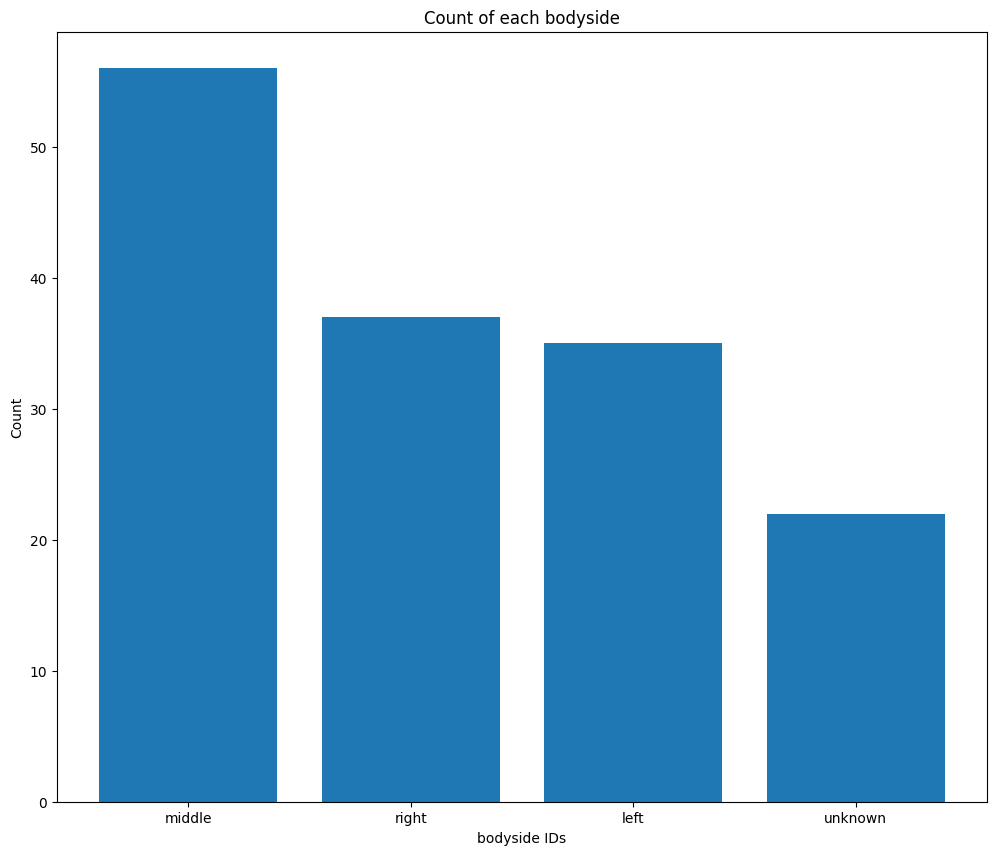

In [11]:
value_count_tools = tools_loop_association_df['bodyside_id'].value_counts()
tool_ids = [get_tools(x) for x in value_count_tools.index]
tool_counts = value_count_tools.values

plt.figure(figsize=(12, 10))

plt.bar(tool_ids, tool_counts)
plt.xlabel('bodyside IDs')
plt.ylabel('Count')
plt.title('Count of each bodyside')

plt.show()